In [1]:
import datajoint as dj

import numpy as np
dj.config["enable_python_native_blobs"] = True
dj.config['database.host'] = '130.223.197.5:3305' 
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'dbD9pzum@RifRaf'
ConnMessage=dj.conn()

import matplotlib.pyplot as plt
from scipy import stats
from Schema import lcProj
from Schema.mouse_inject_lc_proj import inject_mice_csv_batch, inject_sessions
from Schema.baseline import baseline
all_schemas=dj.list_schemas()

import pandas as pd
import os

[2024-06-17 10:27:25,289][INFO]: Connecting root@130.223.197.5:3305
[2024-06-17 10:27:25,356][INFO]: Connected root@130.223.197.5:3305


In [3]:
(lcProj.Mouse & 'mouse_name = "MPC09"').delete()

[2024-06-17 08:06:56,725][INFO]: Deleting 2 rows from `lc_proj_schema`.`baseline_session`
[2024-06-17 08:06:56,748][INFO]: Deleting 2 rows from `lc_proj_schema`.`fib_session`
[2024-06-17 08:06:56,782][INFO]: Deleting 2 rows from `lc_proj_schema`.`__hypnogram`
[2024-06-17 08:06:56,795][INFO]: Deleting 2 rows from `lc_proj_schema`.`session`
[2024-06-17 08:06:56,807][INFO]: Deleting 1 rows from `lc_proj_schema`.`mouse`


Deletes committed.


1

In [2]:
lcProj.LCPeaks.populate()

In [ ]:
signaldff = dff
signalTime = timestamps

fs = int(np.round(1 / np.mean(np.diff(timestamps))))

lpfilt = signal.firwin(1000, 0.01 / (fs / 2), pass_zero='lowpass')

filtsing = signal.filtfilt(lpfilt, -1, signaldff)

baseline = np.zeros_like(filtsing)

print('Baseline Calculation started!')

for i_timepoint in range(len(filtsing )):

    windowSignal = filtsing[np.max([0, i_timepoint - window * fs]):np.min([len(filtsing), (i_timepoint + window * fs)])]
    baseline[i_timepoint] = np.percentile(windowSignal, 5)

   # if np.mod(i_timepoint,1000) == 0:

    #    print('Calculation at:' + str(i_timepoint))

print('Baseline Calculated!')

TimesOfb = np.arange(0,(len(b))*4,4)

exp = 'n+[^w]*'
NoWake = re.finditer(exp, b)

NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])

points = []
baselineAprox = []

interpIntervals = 0

NREMBaselineSignal = []
NREMBaselinePoints = []
NREMBaselineTimesOfB = []

NREMBaselineInterTimeStartPoint = []
NREMBaselineInterTimeStartPointBfile = []
NREMBaselineInterTimeEndPoint = []
NREMBaselineInterTimeEndPointBfile = []

for i, s in enumerate(zip(NoWakeStart,NoWakeStop)):

    StartIndexToKeep = TimesOfb[s[0]]
    StopIndexToKeep = TimesOfb[s[1]-1] + 4

    StartIndexDff = findPosFromTimestamps(signalTime,StartIndexToKeep)
    StopIndexDff = findPosFromTimestamps(signalTime,StopIndexToKeep)

    NREMBaselineSignal.append(baseline[StartIndexDff:StopIndexDff])
    NREMBaselinePoints.append(signalTime[StartIndexDff:StopIndexDff])
    NREMBaselineTimesOfB.append(np.arange(TimesOfb[s[0]],(TimesOfb[s[1]-1] + 4),4))

    points.append(signalTime[StartIndexDff:StopIndexDff])
    baselineAprox.append(baseline[StartIndexDff:StopIndexDff])

    if i == 0:

        interpIntervals += 1
        NREMBaselineInterTimeStartPoint.append(np.nan)
        NREMBaselineInterTimeStartPointBfile.append(np.nan)

        EndPoint = findPosFromTimestamps(signalTime,StartIndexToKeep)

        NREMBaselineInterTimeEndPoint.append(signalTime[EndPoint])
        NREMBaselineInterTimeEndPointBfile.append(TimesOfb[s[0]])

        continue

    interpIntervals += 1
    StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

    NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
    NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i-1]])

    Endoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStart[i]]))

    NREMBaselineInterTimeEndPoint.append(signalTime[Endoint])
    NREMBaselineInterTimeEndPointBfile.append(TimesOfb[NoWakeStart[i]])

    if i == (len(NoWakeStart) - 1):

        interpIntervals += 1
        StartPoint =  findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i]]))

        NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
        NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i]])

        NREMBaselineInterTimeEndPoint.append(np.nan)
        NREMBaselineInterTimeEndPointBfile.append(np.nan)

In [ ]:
lcProj.LCPeaks.populate()

In [2]:
dff = (lcProj.FibDFF & 'mouse_name = "AMYG02"' & 'session_date = "2024-01-16"').fetch1('dff')
timestamps = (lcProj.FibDFF & 'mouse_name = "AMYG02"' & 'session_date = "2024-01-16"').fetch1('timestamps')

b = (lcProj.Hypnogram & 'mouse_name = "AMYG02"' & 'session_date = "2024-01-16"').fetch1('bfile')


In [4]:
from Schema.UsefulFunctions import findPosFromTimestamps
from scipy import signal
import re

window = 60

signaldff = dff
signalTime = timestamps

fs = int(np.round(1 / np.mean(np.diff(timestamps))))

lpfilt = signal.firwin(1000, 0.01 / (fs / 2), pass_zero='lowpass')

filtsing = signal.filtfilt(lpfilt, -1, signaldff)

baseline = np.zeros_like(filtsing)

print('Baseline Calculation started!')

for i_timepoint in range(len(filtsing )):

    windowSignal = filtsing[np.max([0, i_timepoint - window * fs]):np.min([len(filtsing), (i_timepoint + window * fs)])]
    baseline[i_timepoint] = np.percentile(windowSignal, 5)

   # if np.mod(i_timepoint,1000) == 0:

    #    print('Calculation at:' + str(i_timepoint))

print('Baseline Calculated!')

TimesOfb = np.arange(0,(len(b))*4,4)

exp = '[n2]+[^w]*'
NoWake = re.finditer(exp, b)

NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])

points = []
baselineAprox = []

interpIntervals = 0

NREMBaselineSignal = []
NREMBaselinePoints = []
NREMBaselineTimesOfB = []

NREMBaselineInterTimeStartPoint = []
NREMBaselineInterTimeStartPointBfile = []
NREMBaselineInterTimeEndPoint = []
NREMBaselineInterTimeEndPointBfile = []

for i, s in enumerate(zip(NoWakeStart,NoWakeStop)):

    StartIndexToKeep = TimesOfb[s[0]]
    StopIndexToKeep = TimesOfb[s[1]-1] + 4

    StartIndexDff = findPosFromTimestamps(signalTime,StartIndexToKeep)
    StopIndexDff = findPosFromTimestamps(signalTime,StopIndexToKeep)

    NREMBaselineSignal.append(baseline[StartIndexDff:StopIndexDff])
    NREMBaselinePoints.append(signalTime[StartIndexDff:StopIndexDff])
    NREMBaselineTimesOfB.append(np.arange(TimesOfb[s[0]],(TimesOfb[s[1]-1] + 4),4))

    points.append(signalTime[StartIndexDff:StopIndexDff])
    baselineAprox.append(baseline[StartIndexDff:StopIndexDff])

    if NoWakeStart[i] == 0:
        continue

    if i == 0 and not(NoWakeStart[i] == 0):

        interpIntervals += 1
        NREMBaselineInterTimeStartPoint.append(np.nan)
        NREMBaselineInterTimeStartPointBfile.append(np.nan)
        EndPoint = findPosFromTimestamps(signalTime,StartIndexToKeep)

        NREMBaselineInterTimeEndPoint.append(signalTime[EndPoint])
        NREMBaselineInterTimeEndPointBfile.append(TimesOfb[s[0]])
        continue

    interpIntervals += 1
    StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

    NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
    NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i-1]])

    Endoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStart[i]]))

    NREMBaselineInterTimeEndPoint.append(signalTime[Endoint])
    NREMBaselineInterTimeEndPointBfile.append(TimesOfb[NoWakeStart[i]])

    if i == (len(NoWakeStart) - 1) and not(NoWakeStop[i] == len(b)):

        interpIntervals += 1
        StartPoint =  findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i]]))

        NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
        NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i]])

        NREMBaselineInterTimeEndPoint.append(np.nan)
        NREMBaselineInterTimeEndPointBfile.append(np.nan)

InterLinesSignal = []
InterLinesPoints = []

for i, p in enumerate(zip(NREMBaselineInterTimeStartPoint,NREMBaselineInterTimeEndPoint)):

    if np.isnan(p[0]):

        time = p[1]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([Pos])*np.nan)
        InterLinesPoints.append(signalTime[0:Pos])

        points.append(signalTime[0:Pos])
        baselineAprox.append(np.ones([Pos])*np.nan)

    elif np.isnan(p[1]):

        time = p[0]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([max(0,len(baseline)-Pos -1)])*np.nan)
        InterLinesPoints.append(signalTime[(Pos+1)::])

        points.append(signalTime[(Pos+1)::])
        baselineAprox.append(np.ones([max(0,len(baseline)-Pos -1)])*np.nan)
    else:

        timeStart = findPosFromTimestamps(signalTime, p[0])
        timeEnd = findPosFromTimestamps(signalTime, p[1])

        numberOfPoints = timeEnd - timeStart + 1

        TimeSignal = np.ones([numberOfPoints])*np.nan
        TimePoints = signalTime[timeStart:(timeEnd +1)]

        InterLinesSignal.append(TimeSignal[1:-1])
        InterLinesPoints.append(TimePoints[1:-1])

        points.append(TimePoints[1:-1])
        baselineAprox.append(TimeSignal[1:-1])

points = np.concatenate(points)
baselineAprox = np.concatenate(baselineAprox)

baselineAndPoints = np.transpose(np.array([baselineAprox,points]))

baselineAndPointsSorted = baselineAndPoints[baselineAndPoints[:,1].argsort()]

baselineFinal = baselineAndPointsSorted[:,0]
times = baselineAndPointsSorted[:,1]

mean =  np.mean(times[np.invert(np.isnan(baselineFinal))])
std = np.std(times[np.invert(np.isnan(baselineFinal))])

x = (times[np.invert(np.isnan(baselineFinal))] - mean)/std

cof = np.polyfit(x, baselineFinal[np.invert(np.isnan(baselineFinal))] , 2)

fitbas = np.polyval(cof,(signalTime-mean)/std)

Baseline Calculation started!
Baseline Calculated!


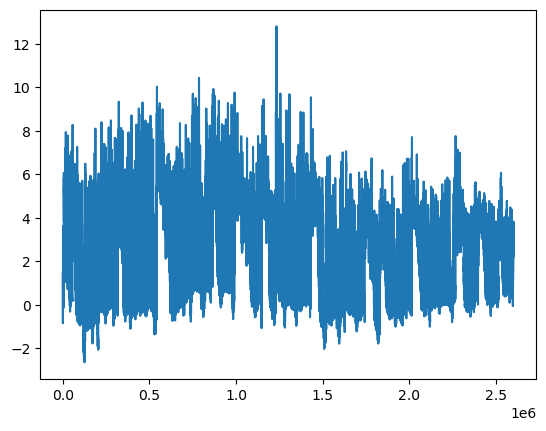

In [5]:
plt.plot(dff-fitbas)

In [40]:
from scipy import signal
import re
window = 60
from Schema.UsefulFunctions import findPosFromTimestamps

TimesOfb = np.arange(0,(len(b))*4,4)

exp = '[n2]+[^w]*'
NoWake = re.finditer(exp, b)

NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])


In [41]:
  NoWakeStart

[0, 4, 8, 12]

In [42]:
  NoWakeStop

[2, 6, 10, 14]

In [43]:
 NoWakeStart[i]

0

In [45]:
 StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[0]))

In [46]:
 StartPoint

0

In [47]:
i = 0

In [48]:
findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i]]))

475

In [21]:
from scipy import signal
import re
window = 60
from Schema.UsefulFunctions import findPosFromTimestamps

TimesOfb = np.arange(0,(len(b))*4,4)

exp = '[n2]+[^w]*'
NoWake = re.finditer(exp, b)

NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])

points = []
baselineAprox = []

interpIntervals = 0

NREMBaselineSignal = []
NREMBaselinePoints = []
NREMBaselineTimesOfB = []

NREMBaselineInterTimeStartPoint = []
NREMBaselineInterTimeStartPointBfile = []
NREMBaselineInterTimeEndPoint = []
NREMBaselineInterTimeEndPointBfile = []

for i, s in enumerate(zip(NoWakeStart,NoWakeStop)):

    StartIndexToKeep = TimesOfb[s[0]]
    StopIndexToKeep = TimesOfb[s[1]-1] + 4

    StartIndexDff = findPosFromTimestamps(signalTime,StartIndexToKeep)
    StopIndexDff = findPosFromTimestamps(signalTime,StopIndexToKeep)

    NREMBaselineSignal.append(baseline[StartIndexDff:StopIndexDff])
    NREMBaselinePoints.append(signalTime[StartIndexDff:StopIndexDff])
    NREMBaselineTimesOfB.append(np.arange(TimesOfb[s[0]],(TimesOfb[s[1]-1] + 4),4))

    points.append(signalTime[StartIndexDff:StopIndexDff])
    baselineAprox.append(baseline[StartIndexDff:StopIndexDff])

    if i == 0:

        interpIntervals += 1
        NREMBaselineInterTimeStartPoint.append(np.nan)
        NREMBaselineInterTimeStartPointBfile.append(np.nan)
        EndPoint = findPosFromTimestamps(signalTime,StartIndexToKeep)

        NREMBaselineInterTimeEndPoint.append(signalTime[EndPoint])
        NREMBaselineInterTimeEndPointBfile.append(TimesOfb[s[0]])

        continue

    interpIntervals += 1
    
    if NoWakeStart == 0:
        StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStart]))
    else:
      StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

    if NoWakeStart == 0:
        
        NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
        NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i-1]])
    
    else:
        NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
        NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i-1]])

    Endoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStart[i]]))

    NREMBaselineInterTimeEndPoint.append(signalTime[Endoint])
    NREMBaselineInterTimeEndPointBfile.append(TimesOfb[NoWakeStart[i]])

    if i == (len(NoWakeStart) - 1) and not(NoWakeStop[i] == len(b)):

        interpIntervals += 1
        StartPoint =  findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i]]))

        NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
        NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i]])

        NREMBaselineInterTimeEndPoint.append(np.nan)
        NREMBaselineInterTimeEndPointBfile.append(np.nan)

InterLinesSignal = []
InterLinesPoints = []

for i, p in enumerate(zip(NREMBaselineInterTimeStartPoint,NREMBaselineInterTimeEndPoint)):

    if np.isnan(p[0]):

        time = p[1]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([Pos])*np.nan)
        InterLinesPoints.append(signalTime[0:Pos])

        points.append(signalTime[0:Pos])
        baselineAprox.append(np.ones([Pos])*np.nan)

    elif np.isnan(p[1]):

        time = p[0]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([max(0,len(baseline)-Pos -1)])*np.nan)
        InterLinesPoints.append(signalTime[(Pos+1)::])

        points.append(signalTime[(Pos+1)::])
        baselineAprox.append(np.ones([max(0,len(baseline)-Pos -1)])*np.nan)
    else:

        timeStart = findPosFromTimestamps(signalTime, p[0])
        timeEnd = findPosFromTimestamps(signalTime, p[1])
        
        print(i)
        
        print(p[0])
        print(p[1])

        numberOfPoints = timeEnd - timeStart + 1

        TimeSignal = np.ones([numberOfPoints])*np.nan
        TimePoints = signalTime[timeStart:(timeEnd +1)]

        InterLinesSignal.append(TimeSignal[1:-1])
        InterLinesPoints.append(TimePoints[1:-1])

        points.append(TimePoints[1:-1])
        baselineAprox.append(TimeSignal[1:-1])

points = np.concatenate(points)
baselineAprox = np.concatenate(baselineAprox)

baselineAndPoints = np.transpose(np.array([baselineAprox,points]))

baselineAndPointsSorted = baselineAndPoints[baselineAndPoints[:,1].argsort()]

baselineFinal = baselineAndPointsSorted[:,0]
times = baselineAndPointsSorted[:,1]

mean =  np.mean(times[np.invert(np.isnan(baselineFinal))])
std = np.std(times[np.invert(np.isnan(baselineFinal))])

x = (times[np.invert(np.isnan(baselineFinal))] - mean)/std

cof = np.polyfit(x, baselineFinal[np.invert(np.isnan(baselineFinal))] , 2)

fitbas = np.polyval(cof,(signalTime-mean)/std)


Baseline Calculation started!
Baseline Calculated!
0
43131.98222081804
0.11208375000000001


ValueError: negative dimensions are not allowed

In [33]:
StartIndexToKeep = TimesOfb[NoWakeStart[0]]
StopIndexToKeep = TimesOfb[NoWakeStop[1]-1] + 4

StartIndexDff = findPosFromTimestamps(signalTime,StartIndexToKeep)
StopIndexDff = findPosFromTimestamps(signalTime,StopIndexToKeep)


NREMBaselineSignal.append(baseline[StartIndexDff:StopIndexDff])
NREMBaselinePoints.append(signalTime[StartIndexDff:StopIndexDff])
NREMBaselineTimesOfB.append(np.arange(TimesOfb[s[0]],(TimesOfb[s[1]-1] + 4),4))

points.append(signalTime[StartIndexDff:StopIndexDff])
baselineAprox.append(baseline[StartIndexDff:StopIndexDff])


In [35]:
(TimesOfb[NoWakeStop[i-1]])

43132

In [31]:
StopIndexDff

6017

In [17]:
len(b)

10800

In [13]:
NREMBaselineInterTimeEndPoint

[0.11208375000000001,
 28.00008375,
 144.00088275,
 184.00688275,
 223.99628374999998,
 296.00708275,
 339.99708375,
 388.00428375,
 435.99488375,
 484.00208275,
 551.99568375,
 692.00008375,
 716.00368275,
 747.99188375,
 759.9936827500001,
 824.00328375,
 883.99568275,
 1191.99208275,
 1215.9956837500001,
 1388.00488375,
 1419.99308275,
 1608.00468275,
 1620.0064837500001,
 1639.99288275,
 1679.9988827500001,
 1836.0056837500001,
 2075.99188375,
 2107.9966837499996,
 2168.0056837499997,
 2191.99268275,
 2268.0040827499997,
 2659.9966487503702,
 2867.994898749938,
 2928.003898749938,
 3011.9999807498766,
 3060.0072637495678,
 3148.0039477492587,
 3415.994679749012,
 3519.9938457486414,
 3527.9950447486417,
 3539.9968457486416,
 3564.0004447486417,
 3712.0062937487032,
 3796.0023777486417,
 3963.994542748518,
 3971.9957427485183,
 4116.000909748642,
 4144.00519274858,
 4407.995324748334,
 4511.994407748519,
 4619.994089748457,
 4688.004373748148,
 4867.998505747901,
 4996.001187747839,

In [ ]:
exp = '[n2]+[^w]*'
NoWake = re.finditer(exp, b)

NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])

points = []
baselineAprox = []

interpIntervals = 0

NREMBaselineSignal = []
NREMBaselinePoints = []
NREMBaselineTimesOfB = []

NREMBaselineInterTimeStartPoint = []
NREMBaselineInterTimeStartPointBfile = []
NREMBaselineInterTimeEndPoint = []
NREMBaselineInterTimeEndPointBfile = []

for i, s in enumerate(zip(NoWakeStart,NoWakeStop)):

    StartIndexToKeep = TimesOfb[s[0]]
    StopIndexToKeep = TimesOfb[s[1]-1] + 4

    StartIndexDff = findPosFromTimestamps(signalTime,StartIndexToKeep)
    StopIndexDff = findPosFromTimestamps(signalTime,StopIndexToKeep)

    NREMBaselineSignal.append(baseline[StartIndexDff:StopIndexDff])
    NREMBaselinePoints.append(signalTime[StartIndexDff:StopIndexDff])
    NREMBaselineTimesOfB.append(np.arange(TimesOfb[s[0]],(TimesOfb[s[1]-1] + 4),4))

    points.append(signalTime[StartIndexDff:StopIndexDff])
    baselineAprox.append(baseline[StartIndexDff:StopIndexDff])

    if i == 0 and not(NoWakeStart[i] == 0):

        interpIntervals += 1
        NREMBaselineInterTimeStartPoint.append(np.nan)
        NREMBaselineInterTimeStartPointBfile.append(np.nan)
        EndPoint = findPosFromTimestamps(signalTime,StartIndexToKeep)

        NREMBaselineInterTimeEndPoint.append(signalTime[EndPoint])
        NREMBaselineInterTimeEndPointBfile.append(TimesOfb[s[0]])

        continue

    interpIntervals += 1
    StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

    NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
    NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i-1]])

    Endoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStart[i]]))

    NREMBaselineInterTimeEndPoint.append(signalTime[Endoint])
    NREMBaselineInterTimeEndPointBfile.append(TimesOfb[NoWakeStart[i]])

    if i == (len(NoWakeStart) - 1) and not(NoWakeStop[i] == len(b)):

        interpIntervals += 1
        StartPoint =  findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i]]))

        NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
        NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i]])

        NREMBaselineInterTimeEndPoint.append(np.nan)
        NREMBaselineInterTimeEndPointBfile.append(np.nan)

InterLinesSignal = []
InterLinesPoints = []

for i, p in enumerate(zip(NREMBaselineInterTimeStartPoint,NREMBaselineInterTimeEndPoint)):

    if np.isnan(p[0]):

        time = p[1]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([Pos])*np.nan)
        InterLinesPoints.append(signalTime[0:Pos])

        points.append(signalTime[0:Pos])
        baselineAprox.append(np.ones([Pos])*np.nan)

    elif np.isnan(p[1]):

        time = p[0]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([max(0,len(baseline)-Pos -1)])*np.nan)
        InterLinesPoints.append(signalTime[(Pos+1)::])

        points.append(signalTime[(Pos+1)::])
        baselineAprox.append(np.ones([max(0,len(baseline)-Pos -1)])*np.nan)
    else:

        timeStart = findPosFromTimestamps(signalTime, p[0])
        timeEnd = findPosFromTimestamps(signalTime, p[1])

        numberOfPoints = timeEnd - timeStart + 1

        TimeSignal = np.ones([numberOfPoints])*np.nan
        TimePoints = signalTime[timeStart:(timeEnd +1)]

        InterLinesSignal.append(TimeSignal[1:-1])
        InterLinesPoints.append(TimePoints[1:-1])

        points.append(TimePoints[1:-1])
        baselineAprox.append(TimeSignal[1:-1])

points = np.concatenate(points)
baselineAprox = np.concatenate(baselineAprox)

baselineAndPoints = np.transpose(np.array([baselineAprox,points]))

baselineAndPointsSorted = baselineAndPoints[baselineAndPoints[:,1].argsort()]

baselineFinal = baselineAndPointsSorted[:,0]
times = baselineAndPointsSorted[:,1]

mean =  np.mean(times[np.invert(np.isnan(baselineFinal))])
std = np.std(times[np.invert(np.isnan(baselineFinal))])

x = (times[np.invert(np.isnan(baselineFinal))] - mean)/std

cof = np.polyfit(x, baselineFinal[np.invert(np.isnan(baselineFinal))] , 2)

fitbas = np.polyval(cof,(signalTime-mean)/std)

In [ ]:
plt.plot(dff-fitbas)

In [2]:
NoWakeStop[423]

NameError: name 'NoWakeStop' is not defined

In [3]:
NoWakeStart[423]

NameError: name 'NoWakeStart' is not defined

In [4]:
b[NoWakeStart[423]:NoWakeStop[423]]

NameError: name 'b' is not defined

In [5]:
b1 = 'wwnnwwnn'

In [6]:
exp = '[n2]+[^w]*'
NoWake = re.finditer(exp, b1)

NameError: name 're' is not defined

In [7]:
NoWake

NameError: name 'NoWake' is not defined

In [8]:
NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])


NameError: name 'NoWake' is not defined

In [9]:
NoWakeStart

[]

In [10]:
NoWakeStop

[]

In [11]:
fig = plt.figure(figsize=(20, 10))
plt.plot(dff-fitbas)

NameError: name 'plt' is not defined

In [12]:
import numpy as np
import re

b= 'wwnnwwnnww'


exp = 'n+[^w]*'
NoWake = re.finditer(exp, b)

NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])



In [13]:
NoWakeStart

[2, 6]

In [14]:
NoWakeStop

[4, 8]

In [15]:
TimesOfb = np.arange(0,(len(b))*4,4)

In [16]:
signalTime = np.arange(0,40)

In [17]:
singalTime[-1]

NameError: name 'singalTime' is not defined

In [18]:
i = 1

In [19]:
for s in zip(NoWakeStart,NoWakeStop):

    StartIndexToKeep = TimesOfb[s[0]]
    StopIndexToKeep = TimesOfb[s[1]-1] + 4

In [20]:
StartIndexToKeep = TimesOfb[NoWakeStart[i]]
StopIndexToKeep = TimesOfb[NoWakeStop[i]-1] + 4

In [21]:
StartIndexToKeep

24

In [22]:
StopIndexToKeep 

32

In [23]:
findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

NameError: name 'findPosFromTimestamps' is not defined

In [24]:
findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

NameError: name 'findPosFromTimestamps' is not defined

In [25]:
  StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

NameError: name 'findPosFromTimestamps' is not defined

In [26]:
StartPoint-1

NameError: name 'StartPoint' is not defined

In [27]:
len(NoWakeStart) - 1

1

In [28]:
len(NoWakeStart)

2

In [29]:
StartIndexDff = findPosFromTimestamps(signalTime,StartIndexToKeep)
StopIndexDff = findPosFromTimestamps(signalTime,StopIndexToKeep)

NameError: name 'findPosFromTimestamps' is not defined

In [30]:
TimesOfb[NoWakeStop[i]]

32

In [31]:
StopIndexDff 

NameError: name 'StopIndexDff' is not defined

In [32]:
signalTime[StartIndexDff:StopIndexDff]

NameError: name 'StartIndexDff' is not defined

In [33]:
TimesOfb[s[0]]

24

In [34]:
exp = 'n+[^w]*'
NoWake = re.finditer(exp, b)

NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])

points = []
baselineAprox = []

interpIntervals = 0

NREMBaselineSignal = []
NREMBaselinePoints = []
NREMBaselineTimesOfB = []

NREMBaselineInterTimeStartPoint = []
NREMBaselineInterTimeStartPointBfile = []
NREMBaselineInterTimeEndPoint = []
NREMBaselineInterTimeEndPointBfile = []

for i, s in enumerate(zip(NoWakeStart,NoWakeStop)):

    StartIndexToKeep = TimesOfb[s[0]]
    StopIndexToKeep = TimesOfb[s[1]-1] + 4

    StartIndexDff = findPosFromTimestamps(signalTime,StartIndexToKeep)
    StopIndexDff = findPosFromTimestamps(signalTime,StopIndexToKeep)

    NREMBaselinePoints.append(signalTime[StartIndexDff:StopIndexDff])
    NREMBaselineTimesOfB.append(np.arange(TimesOfb[s[0]],(TimesOfb[s[1]-1] + 4),4))

    points.append(NREMBaselinePoints)
    baselineAprox.append(NREMBaselineSignal)

    if i == 0:

        interpIntervals += 1
        NREMBaselineInterTimeStartPoint.append(np.nan)
        NREMBaselineInterTimeStartPointBfile.append(np.nan)

        EndPoint = findPosFromTimestamps(signalTime,StartIndexToKeep)

        NREMBaselineInterTimeEndPoint.append(signalTime[EndPoint])
        NREMBaselineInterTimeEndPointBfile.append(TimesOfb[s[0]])

        continue

    interpIntervals += 1
    StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

    NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
    NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i-1]])

    Endoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStart[i]]))

    NREMBaselineInterTimeEndPoint.append(signalTime[Endoint])
    NREMBaselineInterTimeEndPointBfile.append(TimesOfb[NoWakeStart[i]])

    if i == (len(NoWakeStart) - 1):

        interpIntervals += 1
        StartPoint =  findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i]]))

        NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
        NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i]])

        NREMBaselineInterTimeEndPoint.append(np.nan)
        NREMBaselineInterTimeEndPointBfile.append(np.nan)

NameError: name 'findPosFromTimestamps' is not defined

In [35]:
NREMBaselineInterTimeStartPoint

[]

In [36]:
NREMBaselineInterTimeEndPoint

[]

In [37]:
time = 8

In [38]:
 Pos = findPosFromTimestamps(signalTime, time)

NameError: name 'findPosFromTimestamps' is not defined

In [39]:
np.ones([1,Pos])*np.nan

NameError: name 'Pos' is not defined

In [40]:


time = NREMBaselineInterTimeStartPoint[-1]

IndexError: list index out of range

In [41]:
time

8

In [42]:
len(signalTime)-Pos -1

NameError: name 'Pos' is not defined

In [43]:
Pos = findPosFromTimestamps(signalTime, time)


NameError: name 'findPosFromTimestamps' is not defined

In [44]:
np.ones([1,max(0,len(signalTime)-Pos -1)])*np.nan

NameError: name 'Pos' is not defined

In [ ]:
NREMBaselineInterTimeStartPoint[1]

In [ ]:
NREMBaselineInterTimeEndPoint[1]

In [ ]:
timeStart = findPosFromTimestamps(signalTime, NREMBaselineInterTimeStartPoint[1])
timeEnd = findPosFromTimestamps(signalTime, NREMBaselineInterTimeEndPoint[1])

numberOfPoints = timeEnd - timeStart + 1

In [ ]:
numberOfPoints

In [ ]:
TimeSignal = np.ones([1,numberOfPoints])*np.nan
TimePoints = signalTime[timeStart:(timeEnd +1)]


In [1]:
TimePoints 

NameError: name 'TimePoints' is not defined

In [ ]:
NREMBaselineInterTimeEndPointTimePoints[1:-1]

In [ ]:
NREMBaselineInterTimeEndPoint

In [ ]:
InterLinesSignal = []
InterLinesPoints = []

for i, p in enumerate(zip(NREMBaselineInterTimeStartPoint,NREMBaselineInterTimeEndPoint)):

    if np.isnan(p[0]):

        time = p[1]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([Pos])*np.nan)
        InterLinesPoints.append(signalTime[0:Pos])

    elif np.isnan(p[1]):

        time = p[0]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([max(0,len(signalTime)-Pos -1)])*np.nan)
        InterLinesPoints.append(signalTime[(Pos+1)::])
    else:

        timeStart = findPosFromTimestamps(signalTime, p[0])
        timeEnd = findPosFromTimestamps(signalTime, p[1])

        numberOfPoints = timeEnd - timeStart + 1

        TimeSignal = np.ones([numberOfPoints])*np.nan
        TimePoints = signalTime[timeStart:(timeEnd +1)]

        InterLinesSignal.append(TimeSignal[1:-1])
        InterLinesPoints.append(TimePoints[1:-1])





In [ ]:
from scipy import signal
import numpy as np
import re
from Schema.UsefulFunctions import findPosFromTimestamps

timestamps = np.arange(0,40)
dff = np.arange(0,40)*2

signaldff = dff
signalTime = timestamps

baseline = dff

b = 'wwnnwwnnww'



In [ ]:
signalTime

In [ ]:
TimesOfb = np.arange(0,(len(b))*4,4)

exp = 'n+[^w]*'
NoWake = re.finditer(exp, b)

NoWakeStart = []
NoWakeStop = []

for nowake in NoWake:
    span = nowake.span()
    NoWakeStart .append(span[0])
    NoWakeStop.append(span[1])

points = []
baselineAprox = []

interpIntervals = 0

NREMBaselineSignal = []
NREMBaselinePoints = []
NREMBaselineTimesOfB = []

NREMBaselineInterTimeStartPoint = []
NREMBaselineInterTimeStartPointBfile = []
NREMBaselineInterTimeEndPoint = []
NREMBaselineInterTimeEndPointBfile = []

for i, s in enumerate(zip(NoWakeStart,NoWakeStop)):


    StartIndexToKeep = TimesOfb[s[0]]
    StopIndexToKeep = TimesOfb[s[1]-1] + 4

    StartIndexDff = findPosFromTimestamps(signalTime,StartIndexToKeep)
    StopIndexDff = findPosFromTimestamps(signalTime,StopIndexToKeep)
    
    print(StartIndexDff)
    print(StopIndexDff)

    NREMBaselineSignal.append(baseline[StartIndexDff:StopIndexDff])
    NREMBaselinePoints.append(signalTime[StartIndexDff:StopIndexDff])
    NREMBaselineTimesOfB.append(np.arange(TimesOfb[s[0]],(TimesOfb[s[1]-1] + 4),4))

    points.append(signalTime[StartIndexDff:StopIndexDff])
    baselineAprox.append(baseline[StartIndexDff:StopIndexDff])
    
    print(points)

    if i == 0:

        interpIntervals += 1
        NREMBaselineInterTimeStartPoint.append(np.nan)
        NREMBaselineInterTimeStartPointBfile.append(np.nan)

        EndPoint = findPosFromTimestamps(signalTime,StartIndexToKeep)

        NREMBaselineInterTimeEndPoint.append(signalTime[EndPoint])
        NREMBaselineInterTimeEndPointBfile.append(TimesOfb[s[0]])

        continue

    interpIntervals += 1
    StartPoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i-1]]))

    NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
    NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i-1]])

    Endoint = findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStart[i]]))

    NREMBaselineInterTimeEndPoint.append(signalTime[Endoint])
    NREMBaselineInterTimeEndPointBfile.append(TimesOfb[NoWakeStart[i]])

    if i == (len(NoWakeStart) - 1):

        interpIntervals += 1
        StartPoint =  findPosFromTimestamps(signalTime, (TimesOfb[NoWakeStop[i]]))

        NREMBaselineInterTimeStartPoint.append(signalTime[StartPoint-1])
        NREMBaselineInterTimeStartPointBfile.append(TimesOfb[NoWakeStop[i]])

        NREMBaselineInterTimeEndPoint.append(np.nan)
        NREMBaselineInterTimeEndPointBfile.append(np.nan)

In [ ]:
print(points)

In [ ]:
points[3]

In [2]:
A = np.concatenate(points)

NameError: name 'np' is not defined

In [3]:
points

NameError: name 'points' is not defined

In [4]:
NoWakeStart

NameError: name 'NoWakeStart' is not defined

In [5]:
InterLinesSignal = []
InterLinesPoints = []

for i, p in enumerate(zip(NREMBaselineInterTimeStartPoint,NREMBaselineInterTimeEndPoint)):

    if np.isnan(p[0]):

        time = p[1]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([Pos])*np.nan)
        InterLinesPoints.append(signalTime[0:Pos])

        points.append(signalTime[0:Pos])
        baselineAprox.append(np.ones([Pos])*np.nan)

    elif np.isnan(p[1]):

        time = p[0]

        Pos = findPosFromTimestamps(signalTime, time)

        InterLinesSignal.append(np.ones([max(0,len(baseline)-Pos -1)])*np.nan)
        InterLinesPoints.append(signalTime[(Pos+1)::])

        points.append(signalTime[(Pos+1)::])
        baselineAprox.append(np.ones([max(0,len(baseline)-Pos -1)])*np.nan)
    else:

        timeStart = findPosFromTimestamps(signalTime, p[0])
        timeEnd = findPosFromTimestamps(signalTime, p[1])

        numberOfPoints = timeEnd - timeStart + 1

        TimeSignal = np.ones([numberOfPoints])*np.nan
        TimePoints = signalTime[timeStart:(timeEnd +1)]

        InterLinesSignal.append(TimeSignal[1:-1])
        InterLinesPoints.append(TimePoints[1:-1])

        points.append(TimePoints[1:-1])
        baselineAprox.append(TimeSignal[1:-1])

NameError: name 'NREMBaselineInterTimeStartPoint' is not defined

In [6]:
points

NameError: name 'points' is not defined

In [7]:
A = np.concatenate(points)

NameError: name 'np' is not defined

In [8]:
points = np.concatenate(points)
baselineAprox = np.concatenate(baselineAprox)

A = [points, baselineAprox]

NameError: name 'np' is not defined

In [9]:
B = np.array(A)

NameError: name 'np' is not defined

In [10]:
baselineAndPoints = np.array([baselineAprox,points])

NameError: name 'np' is not defined

In [11]:
baselineAndPoints = np.transpose(np.array([baselineAprox,points]))

NameError: name 'np' is not defined

In [12]:
baselineAndPoints

NameError: name 'baselineAndPoints' is not defined

In [13]:
 baselineAndPointsSorted = baselineAndPoints[baselineAndPoints[:,1].argsort()]

NameError: name 'baselineAndPoints' is not defined

In [14]:
print(baselineAndPointsSorted[:,1])

NameError: name 'baselineAndPointsSorted' is not defined

In [15]:
print(baselineAndPointsSorted[:,0])

NameError: name 'baselineAndPointsSorted' is not defined

In [16]:
baselineFinal = baselineAndPointsSorted[:,0]

NameError: name 'baselineAndPointsSorted' is not defined

In [17]:
baselineFinal = baselineAndPointsSorted[:,0]
times = baselineAndPointsSorted[:,1]


NameError: name 'baselineAndPointsSorted' is not defined

In [18]:
times[np.invert(np.isnan(baselineFinal))]

NameError: name 'times' is not defined

In [19]:
cof = np.polyfit(times[np.invert(np.isnan(baselineFinal))] , baselineFinal[np.invert(np.isnan(baselineFinal))] , 2)

NameError: name 'np' is not defined

In [20]:
 fitbas = np.polyval(cof,signalTime)

NameError: name 'np' is not defined

In [21]:
 fitbas

NameError: name 'fitbas' is not defined

In [22]:
bins = 10
mouseListAmyg = ["AMYG01","AMYG02"]

InterREMAmyg = []

fig, axes = plt.subplots(1,1, figsize=(10, 5)) # create figure and axes

for m in mouseListAmyg:

    key = {'mouse_name':m}
    
    CurrentInterREMAmyg =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('inter_rem')),0)
    
    InterREMAmyg.append(CurrentInterREMAmyg)

InterREMAmyg = np.array(InterREMAmyg)

errorAmyg = stats.sem(InterREMAmyg,axis=0)


mouseListHip = ["MHIP03","MHIP05","MHIP06"]

InterREMHip = []

for m in mouseListHip:

    key = {'mouse_name':m}
    
    CurrentInterREMHip =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('inter_rem')),0)
    
    InterREMHip.append(CurrentInterREMHip)

InterREMHip= np.array(InterREMHip)

errorHip = stats.sem(InterREMHip,axis=0)


mouseListPfc = ["MPC05","MPC06"]

InterREMPfc = []

for m in mouseListPfc:

    key = {'mouse_name':m}
    
    CurrentInterREMPfc =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('inter_rem')),0)
    
    InterREMPfc.append(CurrentInterREMPfc)

InterREMPfc = np.array(InterREMPfc)

errorPfc = stats.sem(InterREMPfc,axis=0)


mouseListThal = ["THAL01","THAL02","THAL04","THAL06"]

InterREMThal = []

for m in mouseListThal:

    key = {'mouse_name':m}
    
    CurrentInterREMThal =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('inter_rem')),0)
    
    InterREMThal.append(CurrentInterREMThal)

InterREMThal = np.array(InterREMThal)

errorThal = stats.sem(InterREMThal,axis=0)


axes.plot(np.linspace(0,1,bins),InterREMThal.mean(0), 'g')
axes.fill_between(np.linspace(0,1,bins),InterREMThal.mean(0) - errorThal,  InterREMThal.mean(0) +  errorThal, color ='g' ,alpha = 0.2)
axes.plot(np.linspace(0,1,bins),InterREMAmyg.mean(0), 'r')
axes.fill_between(np.linspace(0,1,bins),InterREMAmyg.mean(0) - errorAmyg,  InterREMAmyg.mean(0) +  errorAmyg, color ='r' ,alpha = 0.2)
axes.plot(np.linspace(0,1,bins),InterREMHip.mean(0), 'b')
axes.fill_between(np.linspace(0,1,bins),InterREMHip.mean(0) - errorHip,  InterREMHip.mean(0) +  errorHip, color ='b' ,alpha = 0.2)
axes.plot(np.linspace(0,1,bins),InterREMPfc.mean(0), 'k')
axes.fill_between(np.linspace(0,1,bins),InterREMPfc.mean(0) - errorPfc,  InterREMPfc.mean(0) +  errorPfc, color ='k' ,alpha = 0.2)

axes.set_ylabel('InterREM Z-scored DFF')

NameError: name 'plt' is not defined

In [23]:
bins = 10
mouseListAmyg = ["AMYG01","AMYG02"]

DuringREMAmyg = []

fig, axes = plt.subplots(1,1, figsize=(10, 5)) # create figure and axes

for m in mouseListAmyg:

    key = {'mouse_name':m}
    
    CurrentDuringREMAmyg =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('during_rem')),0)
    
    DuringREMAmyg.append(CurrentDuringREMAmyg)

DuringREMAmyg = np.array(DuringREMAmyg)

errorAmyg = stats.sem(DuringREMAmyg,axis=0)


mouseListHip = ["MHIP03","MHIP05","MHIP06"]

DuringREMHip = []

for m in mouseListHip:

    key = {'mouse_name':m}
    
    CurrentDuringREMHip =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('during_rem')),0)
    
    DuringREMHip.append(CurrentDuringREMHip)

DuringREMHip= np.array(DuringREMHip)

errorHip = stats.sem(DuringREMHip,axis=0)


mouseListPfc = ["MPC05","MPC06"]

DuringREMPfc = []

for m in mouseListPfc:

    key = {'mouse_name':m}
    
    CurrentDuringREMPfc =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('during_rem')),0)
    
    DuringREMPfc.append(CurrentDuringREMPfc)

DuringREMPfc = np.array(DuringREMPfc)

errorPfc = stats.sem(DuringREMPfc,axis=0)


mouseListThal = ["THAL01","THAL02","THAL04","THAL06"]

DuringREMThal = []

for m in mouseListThal:

    key = {'mouse_name':m}
    
    CurrentDuringREMThal =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('during_rem')),0)
    
    DuringREMThal.append(CurrentDuringREMThal)

DuringREMThal = np.array(DuringREMThal)

errorThal = stats.sem(DuringREMThal,axis=0)


axes.plot(np.linspace(0,1,bins),DuringREMThal.mean(0), 'g')
axes.fill_between(np.linspace(0,1,bins),DuringREMThal.mean(0) - errorThal,  DuringREMThal.mean(0) +  errorThal, color ='g' ,alpha = 0.2)
axes.plot(np.linspace(0,1,bins),DuringREMAmyg.mean(0), 'r')
axes.fill_between(np.linspace(0,1,bins),DuringREMAmyg.mean(0) - errorAmyg,  DuringREMAmyg.mean(0) +  errorAmyg, color ='r' ,alpha = 0.2)
axes.plot(np.linspace(0,1,bins),DuringREMHip.mean(0), 'b')
axes.fill_between(np.linspace(0,1,bins),DuringREMHip.mean(0) - errorHip,  DuringREMHip.mean(0) +  errorHip, color ='b' ,alpha = 0.2)
axes.plot(np.linspace(0,1,bins),DuringREMPfc.mean(0), 'k')
axes.fill_between(np.linspace(0,1,bins),DuringREMPfc.mean(0) - errorPfc,  DuringREMPfc.mean(0) +  errorPfc, color ='k' ,alpha = 0.2)

axes.set_ylabel('DuringREM Z-scored DFF')

NameError: name 'plt' is not defined

In [24]:
np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('inter_rem')),0)

NameError: name 'np' is not defined

In [25]:
np.stack((lcProj.NremRemMeanDFF & key).fetch('inter_rem'))

NameError: name 'np' is not defined

In [26]:
mouseListAmyg = ["AMYG01","AMYG02"]

InterREMAmyg = []

fig, axes = plt.subplots(1,1, figsize=(10, 5)) # create figure and axes

for m in mouseListAmyg:

    key = {'mouse_name':m}
    
    CurrentInterREMAmyg =  np.mean(np.stack((lcProj.NremRemMeanDFF & key).fetch('inter_rem')))
    
    REMAmyg.append(CurrentREMAmyg)

axes[0].set_title('Amyg')
axes[0].set_ylabel('InterREM Z-scored DFF')

mouseListHip = ["MHIP03","MHIP05","MHIP06"]

REMHip = []
NREMHip = []
WAKEHip = []

for m in mouseListHip:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREMHip =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREMHip =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWakeHip =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REMHip.append(CurrentREMHip)
    NREMHip.append(CurrentNREMHip)
    WAKEHip.append(CurrentWakeHip)

dfHip = pd.DataFrame({'MouseName':mouseListHip, 'Mean_REM': REMHip, 'Mean_NREM': NREMHip, 'Mean_Wake': WAKEHip})
boxplotHip = dfHip.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'], ax = axes[1],
                           color=dict(boxes='b', whiskers='b', medians='b', caps='b'),
                           showfliers=False)
axes[1].set_title('dCA1')

mouseListPfc = ["MPC05","MPC06"]

REMPfc = []
NREMPfc = []
WAKEPfc = []

for m in mouseListPfc:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREMPfc =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREMPfc =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWakePfc =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REMPfc.append(CurrentREMPfc)
    NREMPfc.append(CurrentNREMPfc)
    WAKEPfc.append(CurrentWakePfc)

dfPfc = pd.DataFrame({'MouseName':mouseListPfc, 'Mean_REM': REMPfc, 'Mean_NREM': NREMPfc, 'Mean_Wake': WAKEPfc})
boxplotPfc = dfPfc.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'], ax = axes[2],color=dict(boxes='k', whiskers='k', medians='k', caps='k'))
axes[2].set_title('mPFC')



mouseListThal = ["THAL01","THAL02","THAL04","THAL06"]

REMThal = []
NREMThal = []
WAKEThal = []

for m in mouseListThal:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREMThal =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREMThal =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWakeThal =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REMThal.append(CurrentREMThal)
    NREMThal.append(CurrentNREMThal)
    WAKEThal.append(CurrentWakeThal)

dfThal = pd.DataFrame({'MouseName':mouseListThal, 'Mean_REM': REMThal, 'Mean_NREM': NREMThal, 'Mean_Wake': WAKEThal})
boxplotThal = dfThal.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'], ax = axes[3],
                             color=dict(boxes='g', whiskers='g', medians='g', caps='g'),
                             showfliers=False)
axes[3].set_title('Thal')


[ax_tmp.set_ylim(-1.5, 2) for ax_tmp in axes]

plt.tight_layout()


pathToNas = (os.sep + os.sep  + 'nasdcsr.unil.ch' + os.sep + 'RECHERCHE' + os.sep + 'FAC' + os.sep + 'FBM' + os.sep + 'DNF' + os.sep + 'aluthi1' + os.sep + 'sleep' + os.sep + 'D2c' +
              os.sep + 'PROJECT_Georgios' + os.sep + 'LC_Proj_Neurons' + os.sep + 'Figures' + os.sep)

pathToSave=  pathToNas + 'Mean_Levels_SleepStates.pdf'

fig.savefig(pathToSave, format='pdf', dpi=1200) 


NameError: name 'plt' is not defined

In [27]:
mouseListAmyg = ["AMYG01","AMYG02"]

REMAmyg = []
NREMAmyg = []
WAKEAmyg = []

fig, axes = plt.subplots(1,4, figsize=(20, 6)) # create figure and axes

for m in mouseListAmyg:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREMAmyg =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREMAmyg =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWakeAmyg =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REMAmyg.append(CurrentREMAmyg)
    NREMAmyg.append(CurrentNREMAmyg)
    WAKEAmyg.append(CurrentWakeAmyg)

dfAmyg = pd.DataFrame({'MouseName':mouseListAmyg, 'Mean_REM': REMAmyg, 'Mean_NREM': NREMAmyg, 'Mean_Wake': WAKEAmyg})
boxplotAmyg = dfAmyg.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'], ax = axes[0], 
                             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
                             showfliers=False)
axes[0].set_title('Amyg')
axes[0].set_ylabel('Z-scored DFF')

mouseListHip = ["MHIP03","MHIP05","MHIP06"]

REMHip = []
NREMHip = []
WAKEHip = []

for m in mouseListHip:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREMHip =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREMHip =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWakeHip =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REMHip.append(CurrentREMHip)
    NREMHip.append(CurrentNREMHip)
    WAKEHip.append(CurrentWakeHip)

dfHip = pd.DataFrame({'MouseName':mouseListHip, 'Mean_REM': REMHip, 'Mean_NREM': NREMHip, 'Mean_Wake': WAKEHip})
boxplotHip = dfHip.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'], ax = axes[1],
                           color=dict(boxes='b', whiskers='b', medians='b', caps='b'),
                           showfliers=False)
axes[1].set_title('dCA1')

mouseListPfc = ["MPC05","MPC06"]

REMPfc = []
NREMPfc = []
WAKEPfc = []

for m in mouseListPfc:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREMPfc =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREMPfc =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWakePfc =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REMPfc.append(CurrentREMPfc)
    NREMPfc.append(CurrentNREMPfc)
    WAKEPfc.append(CurrentWakePfc)

dfPfc = pd.DataFrame({'MouseName':mouseListPfc, 'Mean_REM': REMPfc, 'Mean_NREM': NREMPfc, 'Mean_Wake': WAKEPfc})
boxplotPfc = dfPfc.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'], ax = axes[2],color=dict(boxes='k', whiskers='k', medians='k', caps='k'))
axes[2].set_title('mPFC')



mouseListThal = ["THAL01","THAL02","THAL04","THAL06"]

REMThal = []
NREMThal = []
WAKEThal = []

for m in mouseListThal:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREMThal =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREMThal =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWakeThal =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REMThal.append(CurrentREMThal)
    NREMThal.append(CurrentNREMThal)
    WAKEThal.append(CurrentWakeThal)

dfThal = pd.DataFrame({'MouseName':mouseListThal, 'Mean_REM': REMThal, 'Mean_NREM': NREMThal, 'Mean_Wake': WAKEThal})
boxplotThal = dfThal.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'], ax = axes[3],
                             color=dict(boxes='g', whiskers='g', medians='g', caps='g'),
                             showfliers=False)
axes[3].set_title('Thal')


[ax_tmp.set_ylim(-1.5, 2) for ax_tmp in axes]

plt.tight_layout()


pathToNas = (os.sep + os.sep  + 'nasdcsr.unil.ch' + os.sep + 'RECHERCHE' + os.sep + 'FAC' + os.sep + 'FBM' + os.sep + 'DNF' + os.sep + 'aluthi1' + os.sep + 'sleep' + os.sep + 'D2c' +
              os.sep + 'PROJECT_Georgios' + os.sep + 'LC_Proj_Neurons' + os.sep + 'Figures' + os.sep)

pathToSave=  pathToNas + 'Mean_Levels_SleepStates.pdf'

fig.savefig(pathToSave, format='pdf', dpi=1200) 


NameError: name 'plt' is not defined

In [28]:
A = []

In [29]:
B = np.array([1,2,3,4,5,6,7,8])

NameError: name 'np' is not defined

In [30]:
A.append(B[3:6])

NameError: name 'B' is not defined

In [31]:
A.append(B[2:5])

NameError: name 'B' is not defined

In [32]:
np.concatenate(A)

NameError: name 'np' is not defined

In [33]:
mouseList = ["MHIP03","MHIP05","MHIP06"]

REM = []
NREM = []
WAKE = []

for m in mouseList:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREM =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREM =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWake =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REM.append(CurrentREM)
    NREM.append(CurrentNREM)
    WAKE.append(CurrentWake)

import pandas as pd
df = pd.DataFrame({'MouseName':mouseList, 'Mean_REM': REM, 'Mean_NREM': NREM, 'Mean_Wake': WAKE})
boxplot = df.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'])
plt.ylim(-1.5,1.5)
plt.show()

NameError: name 'np' is not defined

In [34]:
mouseList = ["MHIP03","MHIP05","MHIP06"]

REM = []
NREM = []
WAKE = []

for m in mouseList:

    key = {'mouse_name':m,
           'window':3}
    
    CurrentREM =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_rem_zscored')))
    CurrentNREM =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_nrem_zscored')))
    CurrentWake =  np.mean(np.stack((lcProj.DFFSleepStates & key).fetch('mean_wake_zscored')))
    
    REM.append(CurrentREM)
    NREM.append(CurrentNREM)
    WAKE.append(CurrentWake)

import pandas as pd
df = pd.DataFrame({'MouseName':mouseList, 'Mean_REM': REM, 'Mean_NREM': NREM, 'Mean_Wake': WAKE})
boxplot = df.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'])
plt.ylim(-1.5,1.5)
plt.show()

NameError: name 'np' is not defined

In [35]:
import pandas as pd
df = pd.DataFrame({'MouseName':mouseList, 'Mean_REM': REM, 'Mean_NREM': NREM, 'Mean_Wake': WAKE})

ValueError: All arrays must be of the same length

In [ ]:
df

In [ ]:
boxplot = df.boxplot(column=['Mean_REM', 'Mean_NREM', 'Mean_Wake'])
plt.show()

In [ ]:
key = {'mouse_name' : "AMYG01",
      'session_date':"2023-12-11"}


bfile = (lcProj.Hypnogram & key).fetch1('bfile')
dff = (lcProj.FibDFF & key).fetch1('dff')
timestamps = (lcProj.FibDFF & key).fetch1('timestamps')


In [ ]:
bfile = 'wwwrrrrrnnnnnnnrnnnnrrrrnnnnrrrrrwww'

In [ ]:
import regex as reg
import re 
from Schema.UsefulFunctions import ElimMA, deltaDynamics, maDynamics, CorrectMirrorAnimals, findPosFromTimestamps,binning


InterREMbouts = reg.finditer('([r3][w1n2]+[r3])', bfile, overlapped=True)

DffInterREMAll = []

for idx, trans in enumerate(InterREMbouts):

    DffInterREM = []

    Beg = list(trans.span())[0] + 1
    End = list(trans.span())[1] - 1

    bInBetween = bfile[Beg:End]

    print(bInBetween)

    NremInBetween = re.finditer('[n2]{3,}', bInBetween)

    NremInBetweenFlag = len(re.findall('[n2]{3,}', bInBetween))

    if NremInBetweenFlag > 0:

        BegDFF =  Beg * 4

        for idx, trans in enumerate(NremInBetween):

            BegNREM = list(trans.span())[0]
            EndNREM = list(trans.span())[1]

            BegDFFNREM = findPosFromTimestamps(timestamps, BegDFF + (BegNREM * 4))

            print(BegDFF + (BegNREM * 4))

            print(BegDFFNREM)

            
            EndDFFNREM = findPosFromTimestamps(timestamps, BegDFF + (EndNREM * 4))

            print(BegDFF + (EndNREM * 4))

            print(EndDFFNREM)

            DffInterREM.append(dff[BegDFFNREM:EndDFFNREM])

        DffInterREM = np.concatenate(DffInterREM)

        DffInterREMZscored = ((DffInterREM - np.mean(DffInterREM)) / np.std(DffInterREM))

        DffInterREMZscoredBinned = binning(DffInterREMZscored)

        DffInterREMAll.append(DffInterREMZscoredBinned)

DffInterREMAllBinned = np.array(DffInterREMAll)


In [ ]:
DffInterREMAllBinned.shape

In [ ]:
Beg

In [ ]:
End

In [ ]:
import regex as re
InterREMbouts = re.finditer('([r3][w1n2]+[r3])', bfile,overlapped=True)


for idx, trans in enumerate(InterREMbouts):

    print(trans.span())




In [ ]:
InterREMbouts =reg.finditer('(?=([r3][w1n2]+[r3]))', bfile)

DffInterREMAll = []

for idx, trans in enumerate(InterREMbouts):

    print(trans.span())


In [ ]:
bfile[7:16]

In [ ]:
bfile[15:25]

In [ ]:
import re
re.finditer('(?=([r3][w1n2]+[r3]))', bfile)



In [ ]:
from Schema.UsefulFunctions import ElimMA, deltaDynamics, maDynamics, CorrectMirrorAnimals, findPosFromTimestamps,binning
import re

InterREMbouts = re.finditer('[r3][w1n2]+[r3]', bfile)

DffInterREMAll = []

i = 0 

for idx, trans in enumerate(InterREMbouts):

    i = i + 1

    print(i)

    DffInterREM = []

    Beg = list(trans.span())[0] + 1
    End = list(trans.span())[1] - 1

    bInBetween = bfile[Beg:End]

    print('New')
    print(bInBetween)

    NremInBetween = re.finditer('[n2]{3,}', bInBetween)


    NremInBetweenFlag = len(re.findall('[n2]{3,}', bInBetween))

    if NremInBetweenFlag > 0:


        BegDFF = Beg * 4
    
        print(BegDFF)
    
        for idx, trans in enumerate(NremInBetween):
    
            BegNREM = list(trans.span())[0]
            EndNREM = list(trans.span())[1]
    
            print(bInBetween[BegNREM:EndNREM])
    
            BegDFFNREM = findPosFromTimestamps(timestamps, BegDFF + (BegNREM*4))
            EndDFFNREM = findPosFromTimestamps(timestamps, BegDFF + (EndNREM*4))
    
            print([BegDFFNREM,EndDFFNREM])
    
    
            DffInterREM.append(dff[BegDFFNREM:EndDFFNREM])
    
        DffInterREM = np.concatenate(DffInterREM)
    
        DffInterREMZscored = ((DffInterREM  - np.mean(DffInterREM)) / np.std(DffInterREM))
    
        DffInterREMZscoredBinned = binning(DffInterREMZscored)
    
        DffInterREMAll.append(DffInterREMZscoredBinned)
    
        DffInterREMAllBinned = np.array(DffInterREMAll)


In [ ]:
NremInBetween =len( re.findall('[n2]{3,}', bInBetween))
 

In [ ]:
NremInBetween

In [ ]:
for idx, trans in enumerate(InterREMbouts):

    DffInterREM = []

    Beg = list(trans.span())[0] + 1
    End = list(trans.span())[1] - 1

    bInBetween = bfile[Beg:End]

    print(bInBetween)

In [ ]:
bInBetween

In [ ]:
NremInBetween = re.finditer('[n2]+', bInBetween)

In [ ]:

NremInBetweenFlag = len(re.findall('[n2]', bInBetween))

In [ ]:
NremInBetweenFlag

In [ ]:
for idx, trans in enumerate(NremInBetween):

        Beg = list(trans.span())[0]
        End = list(trans.span())[1]

        print(bInBetween[Beg:End])



In [36]:
import re
REMbouts = re.finditer('[r3]{3,}',bKeep)
REMSpans = []
DffREM  = []
DffREMZScored  = []

for idx, trans in enumerate(REMbouts):

    Beg = list(trans.span())[0]
    End = list(trans.span())[1]

    BegDFF = findPosFromTimestamps(timestamps, Beg*4)
    EndDFF = findPosFromTimestamps(timestamps, End*4)

    REMSpans.append([BegDFF,EndDFF])
    DffREM.append(dffKeep[BegDFF:EndDFF])
    DffREMZScored.append(dffKeepZScored[BegDFF:EndDFF])

NameError: name 'bKeep' is not defined

In [37]:
dffREM = dffKeep[BegDFF:EndDFF]

dffREMZscored = (( dffREM - np.mean( dffREM ))/np.std(dffREM))


NameError: name 'dffKeep' is not defined

In [38]:
lengthPerBin = int(np.ceil(dffREMZscored.shape[0]/5))

NameError: name 'np' is not defined

In [39]:
plt.plot(dffREM)
plt.plot(dffREMZscored)

NameError: name 'plt' is not defined

In [40]:
plt.plot(sBinned)

NameError: name 'plt' is not defined

In [41]:
sBinned = []

for b in range(nbins):

    if ((b+1)*lengthPerBin <= s.shape[0]):

        print((b*lengthPerBin),((b+1)*lengthPerBin))
    
        currentBin = s[(b*lengthPerBin):((b+1)*lengthPerBin)]
        sBinned.append(np.mean(currentBin))
    
    else:
        print((b*lengthPerBin), s.shape[0])
        currentBin = s[(b*lengthPerBin):]
        sBinned.append(np.mean(currentBin))

    

    

NameError: name 'nbins' is not defined

In [42]:
sBinned

[]

In [43]:
A[1:]

[]

In [44]:
NREMbouts = re.finditer('[n2]{3,}',bKeep)
NREMSpans = []
DffNREM = []
DffNREMZScored  = []

for idx, trans in enumerate(NREMbouts):
    Beg = list(trans.span())[0]
    End = list(trans.span())[1] - 1

    BegDFF = findPosFromTimestamps(timestamps, Beg * 4)
    EndDFF = findPosFromTimestamps(timestamps, End * 4)

    NREMSpans.append([BegDFF,EndDFF])
    DffNREM.append(np.mean(dffKeep[BegDFF:EndDFF]))
    DffNREMZScored.append(np.mean(dffKeepZScored[BegDFF:EndDFF]))

NameError: name 'bKeep' is not defined

In [45]:
Wakebouts = re.finditer('[w1]{4,}',bKeep)
WakeSpans = []
DffWake = []
DffWakeZScored  = []

for idx, trans in enumerate(Wakebouts):
    Beg = list(trans.span())[0]
    End = list(trans.span())[1] - 1

    BegDFF = findPosFromTimestamps(timestamps, Beg * 4)
    EndDFF = findPosFromTimestamps(timestamps, End * 4)

    WakeSpans.append([BegDFF,EndDFF])
    DffWake.append(np.mean(dffKeep[BegDFF:EndDFF]))
    DffWakeZScored.append(np.mean(dffKeepZScored[BegDFF:EndDFF]))

NameError: name 'bKeep' is not defined

In [46]:
len(DffWakeZScored)

NameError: name 'DffWakeZScored' is not defined

In [47]:
bKeep[1291]

NameError: name 'bKeep' is not defined

In [48]:
for idx, trans in enumerate(REMbouts):

    Beg = list(trans.span())[0]
    End = list(trans.span())[1] 

    print(Beg)
    print(End)

NameError: name 'REMbouts' is not defined

In [49]:
lcProj.DFFSleepStates.populate()

NameError: name 'lcProj' is not defined

In [50]:
lcProj.Person.insert1(['GF','gfoustou','Georgios Foustoukos'],skip_duplicates = True)
lcProj.WindowCalculationDFFStates.insert([[3],[6]],skip_duplicates = True)
lcProj.Rig.insert([['Neurobau1.26','Neurobau1 room 26'],['Neurobau1.32','Neurobau1 room 32']],skip_duplicates = True)
inject_mice_csv_batch()
inject_sessions()
lcProj.Hypnogram.populate()
lcProj.FibDFF.populate()
lcProj.LCPeaks.populate()

NameError: name 'lcProj' is not defined

In [51]:
lcProj.BaselineSession & 'mouse_name = "AMYG03"'

NameError: name 'lcProj' is not defined

In [52]:
dff = (lcProj.FibDFF & 'mouse_name = "THAL06"').fetch1('dff')
time = (lcProj.FibDFF & 'mouse_name = "THAL06"').fetch1('timestamps')

NameError: name 'lcProj' is not defined

In [53]:
from Schema.UsefulFunctions import ElimMA, deltaDynamics, maDynamics, CorrectMirrorAnimals, findPosFromTimestamps

In [54]:
bfile = 'wrrrwwwwww'

In [55]:
REMbouts = re.finditer('[r3]{3,}',bfile)


In [56]:
for idx, trans in enumerate(REMbouts):
    Beg = list(trans.span())[0]
    End = list(trans.span())[1] - 1

    print(Beg)
    print(End)

1
3


In [57]:
BegDFF = findPosFromTimestamps(time, Beg*4)
EndDFF = findPosFromTimestamps(time, End*4)


NameError: name 'time' is not defined

In [ ]:
BegDFF

In [ ]:
time[235]

In [ ]:
time[EndDFF-1]

In [ ]:
[BegDFF,EndDFF]

In [ ]:
import mat73

key = {'mouse_name':"MHIP03",
       'session_date':"2023-08-21"}

In [ ]:

key = {'mouse_name':"AMYG01",
       'session_date':"2023-11-30"}

In [ ]:
fileToRead = (lcProj.Session & key).fetch1('file_name')

In [ ]:
fileToRead = (lcProj.Session & key).fetch1('file_name')
fileDff = mat73.loadmat(fileToRead, only_include='dff')

In [ ]:
lcProj.Mouse & 'mouse_name = "MHIP06"'

In [ ]:
dffSamples = fileDff['dff'][1,:]

In [58]:
dffSamples.shape

NameError: name 'dffSamples' is not defined

In [59]:
timestamps = np.transpose(np.arange(0,12,1/36000))


NameError: name 'np' is not defined

In [60]:
timestamps.shape

NameError: name 'timestamps' is not defined

In [2]:
lcProj.Person.insert1(['GF','gfoustou','Georgios Foustoukos'],skip_duplicates = True)
lcProj.WindowCalculationDFFStates.insert([[3],[6]],skip_duplicates = True)
lcProj.Rig.insert([['Neurobau1.26','Neurobau1 room 26'],['Neurobau1.32','Neurobau1 room 32']],skip_duplicates = True)
inject_mice_csv_batch()
inject_sessions()
lcProj.Hypnogram.populate()
lcProj.FibDFF.populate()
lcProj.DFFSleepStates.populate()
lcProj.LCPeaks.populate()
lcProj.MGT.populate()


****
E:\aluthi1\sleep\D2c\PROJECT_Georgios\LC_Proj_Neurons\MiceMetaData


1it [00:00, 14.49it/s]


E:\aluthi1\sleep\D2c\PROJECT_Georgios\LC_Proj_Neurons\MiceMetaData\MiceLCProj.csv
Everything is fine.
{'mouse_name': 'AMYG01', 'responsible_experimenter': 'Georgios Foustoukos', 'pyrat_id': 25249, 'genotype': 'C57BL/6J', 'gender': 'f', 'birth_date': '19.08.2023', 'licence': '2401.4', 'dg': 2, 'start_date': '30.11.2023', 'age': 10, 'sacrifice_date': '06.02.2024', 'proj_type': 'Amy', 'filename': 'MiceLCProj.csv'}
AMYG01 has been ingested.
Everything is fine.
{'mouse_name': 'AMYG02', 'responsible_experimenter': 'Georgios Foustoukos', 'pyrat_id': 25533, 'genotype': 'C57BL/6J', 'gender': 'm', 'birth_date': '25.10.2023', 'licence': '2401.4', 'dg': 2, 'start_date': '24.01.2024', 'age': 12, 'sacrifice_date': '11.03.2024', 'proj_type': 'Amy', 'filename': 'MiceLCProj.csv'}
AMYG02 has been ingested.
Everything is fine.
{'mouse_name': 'MHIP03', 'responsible_experimenter': 'Georgios Foustoukos', 'pyrat_id': 24813, 'genotype': 'C57BL/6J', 'gender': 'm', 'birth_date': '02.06.2023', 'licence': '2401.4

 36%|███▌      | 5/14 [00:00<00:00, 45.05it/s]

This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: AMYG01----------
Loading sessions for mouse: AMYG01
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: AMYG02----------
Loading sessions for mouse: AMYG02
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: AMYG03----------
Loading sessions for mouse: AMYG03
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: MHIP03----------
Loading sessions for mouse: MHIP03
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: MHIP05----------
Loading sessions for mouse: MHIP05
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: MHIP06----------
Loading sessions for mouse: MHIP06
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: MPC05----------


 71%|███████▏  | 10/14 [00:00<00:00, 31.52it/s]

Loading sessions for mouse: MPC10
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: THAL01----------
Loading sessions for mouse: THAL01
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: THAL02----------
Loading sessions for mouse: THAL02
This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: THAL04----------
Loading sessions for mouse: THAL04


100%|██████████| 14/14 [00:00<00:00, 36.94it/s]

This is a mouse from the LC and fiber photometry data with projection neurons!
----------Mouse: THAL06----------
Loading sessions for mouse: THAL06


Inserting the hypogram of mouse: MPC09 for session: 2024-05-29
\\nasdcsr.unil.ch\RECHERCHE\FAC\FBM\DNF\aluthi1\fbm_move\D2c\_PROJECTS\PROJECT_Georgios\LC_Proj_Neurons\Ephys\MPC09\240529_MPC09_12hbas1_bt.mat contains the following vars:
  #refs#
  Infos
  Infos/Configuration
  Infos/Configuration/A1
  Infos/Configuration/A2
  Infos/FileLen
  Infos/Fs
  Infos/OriginalName
  Infos/RecordingDate
  b
  bTrans
  dff
  traceName
  traces


--This file is scored
Inserting the hypogram of mouse: MPC09 for session: 2024-06-07
\\nasdcsr.unil.ch\RECHERCHE\FAC\FBM\DNF\aluthi1\fbm_move\D2c\_PROJECTS\PROJECT_Georgios\LC_Proj_Neurons\Ephys\MPC09\240607_MPC09_12hBas2_bt.mat contains the following vars:
  #refs#
  Infos
  Infos/Configuration
  Infos/Configuration/A1
  Infos/FileLen
  Infos/Fs
  Infos/OriginalName
  Infos/RecordingDate
  b
  bTrans
  dff
  traceName
  traces


--This file is scored
Inserting the hypogram of mouse: MPC09 for session: 2024-06-12
\\nasdcsr.unil.ch\RECHERCHE\FAC\FBM\DNF\aluthi1\fbm_move\D2c\_PROJECTS\PROJECT_Georgios\LC_Proj_Neurons\Ephys\MPC09\240612_MPC09_4hSSD_bt.mat contains the following vars:
  #refs#
  Infos
  Infos/Configuration
  Infos/Configuration/A1
  Infos/Configuration/A2
  Infos/Configuration/A3
  Infos/Configuration/A4
  Infos/FileLen
  Infos/Fs
  Infos/OriginalName
  Infos/RecordingDate
  b
  bTrans
  dff
  traceName
  traces
--This file is scored
Inserting the DFF of mouse: MPC09 for session: 2024-05-29
Inserting the DFF of mouse: MPC09 for session: 2024-06-07
Inserting the DFF of mouse: MPC09 for session: 2024-06-12
Inserting the DFF of mouse: MPC10 for session: 2024-05-29
Computing mouse: MPC09 for session: 2024-05-29
Computing the mean DFF for every sleep state during the baseline recordings for the first 3 hours
Computing mouse: MPC09 for session: 2024-05-29
Computing the mean DFF for every sleep state duri